<a href="https://colab.research.google.com/github/Talha1818/PyTorch/blob/master/Training_through_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# drop unncessary columns
df.drop(columns=['id', 'Unnamed: 32'], inplace= True)

In [4]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [6]:
# normalize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
y_train[:5]

,diagnosis
514,M
340,B
419,B
414,M
215,M


In [8]:
# convert categorical to numeric form
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [9]:
y_train[:5]

array([1, 0, 0, 1, 1])

In [22]:
X_train_tensor = torch.from_numpy(X_train.astype(np.float32))
X_test_tensor = torch.from_numpy(X_test.astype(np.float32))
y_train_tensor = torch.from_numpy(y_train.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.astype(np.float32))

In [11]:
X_train_tensor.shape

torch.Size([455, 30])

# **Model Pipeline (Training From Scratch)**

In [ ]:
class NeuralNetwork():
  def __init__(self, X):
    self.weights = torch.rand(X.shape[1], dtype=torch.float64, requires_grad=True)
    self.bias = torch.zeros(1, dtype=torch.float64, requires_grad=True)

  def forward(self, X):
    z = torch.matmul(X, self.weights) + self.bias
    y_pred = torch.sigmoid(z)
    return y_pred

  def loss_function(self, y_pred, y):
    # Clamp predictions to avoid log(0)
    epsilon = 1e-7
    y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)

    # Calculate loss
    loss = -(y_train_tensor * torch.log(y_pred) + (1 - y_train_tensor) * torch.log(1 - y_pred)).mean()
    return loss

In [ ]:
learning_rate = 0.1
epochs = 25

In [ ]:
# create model
model = NeuralNetwork(X_train_tensor)

# define loop
for epoch in range(epochs):

  # forward pass
  y_pred = model.forward(X_train_tensor)

  # loss calculate
  loss = model.loss_function(y_pred, y_train_tensor)

  # backward pass
  loss.backward()

  # parameters update
  with torch.no_grad():
    model.weights -= learning_rate * model.weights.grad
    model.bias -= learning_rate * model.bias.grad

  # zero gradients
  model.weights.grad.zero_()
  model.bias.grad.zero_()

  # print loss in each epoch
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Epoch: 1, Loss: 0.639068991187537
Epoch: 2, Loss: 0.6241886202857428
Epoch: 3, Loss: 0.6097447249247225
Epoch: 4, Loss: 0.5957160499378004
Epoch: 5, Loss: 0.5820820889846123
Epoch: 6, Loss: 0.5686350910540809
Epoch: 7, Loss: 0.5542359370026737
Epoch: 8, Loss: 0.5402026961094741
Epoch: 9, Loss: 0.5265178415997221
Epoch: 10, Loss: 0.5131650551284281
Epoch: 11, Loss: 0.5001292851272109
Epoch: 12, Loss: 0.4873967942263166
Epoch: 13, Loss: 0.47495519279985504
Epoch: 14, Loss: 0.4627934561166139
Epoch: 15, Loss: 0.45090192350091474
Epoch: 16, Loss: 0.4392722783405939
Epoch: 17, Loss: 0.42789750911631935
Epoch: 18, Loss: 0.4167718525264262
Epoch: 19, Loss: 0.40589072101362367
Epoch: 20, Loss: 0.3952506186296245
Epoch: 21, Loss: 0.3848490502397983
Epoch: 22, Loss: 0.37468443060652434
Epoch: 23, Loss: 0.36475599968593436
Epoch: 24, Loss: 0.35506374990469325
Epoch: 25, Loss: 0.345608368443065


In [ ]:
model.bias

tensor([-0.0579], dtype=torch.float64, requires_grad=True)

Accuracy: 0.9474

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.96      0.96        79
     Class 1       0.91      0.91      0.91        35

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



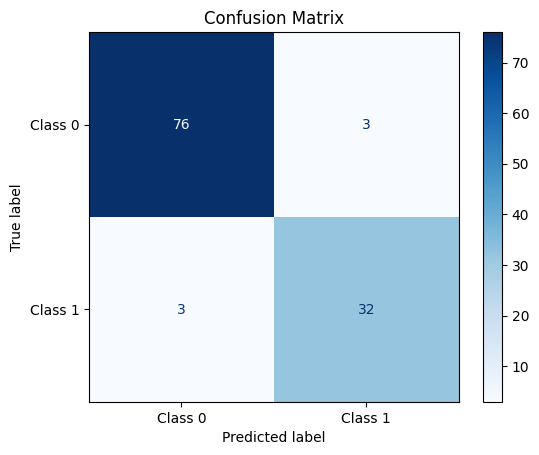

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# model evaluation
with torch.no_grad():
    y_pred_probs = model.forward(X_test_tensor)
    y_pred = (y_pred_probs > 0.5).float()
    accuracy = (y_pred == y_test_tensor).float().mean()
    print(f'Accuracy: {accuracy.item():.4f}')

    # Convert tensors to numpy arrays
    y_pred_np = y_pred.cpu().numpy().astype(int)
    y_true_np = y_test_tensor.cpu().numpy().astype(int)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true_np, y_pred_np, target_names=["Class 0", "Class 1"]))

    # Confusion Matrix
    cm = confusion_matrix(y_true_np, y_pred_np)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()


# **Model Pipeline (Training From NN Module)**

In [13]:
# create model class
import torch
import torch.nn as nn

In [17]:
class NeuralNetworkNNModule(nn.Module):
  def __init__(self, num_features):
    super(NeuralNetworkNNModule, self).__init__()
    self.linear = nn.Linear(num_features, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, X):
    x = self.linear(X)
    x = self.sigmoid(x)
    return x

In [18]:
learning_rate = 0.1
epochs = 25

In [19]:
model = NeuralNetworkNNModule(X_train_tensor.shape[1])

In [20]:
loss_function = nn.BCELoss()

In [23]:
# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# define loop
for epoch in range(epochs):

  # forward pass
  y_pred = model(X_train_tensor)

  # loss calculate
  loss = loss_function(y_pred, y_train_tensor.view(-1,1))

  # clear gradients
  optimizer.zero_grad()

  # backward pass
  loss.backward()

  # parameters update
  optimizer.step()

  # print loss in each epoch
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Epoch: 1, Loss: 0.6182844042778015
Epoch: 2, Loss: 0.4751017391681671
Epoch: 3, Loss: 0.3990999758243561
Epoch: 4, Loss: 0.3514208495616913
Epoch: 5, Loss: 0.3182021677494049
Epoch: 6, Loss: 0.29345110058784485
Epoch: 7, Loss: 0.27413251996040344
Epoch: 8, Loss: 0.2585316300392151
Epoch: 9, Loss: 0.2456003576517105
Epoch: 10, Loss: 0.2346591353416443
Epoch: 11, Loss: 0.22524665296077728
Epoch: 12, Loss: 0.21703770756721497
Epoch: 13, Loss: 0.20979595184326172
Epoch: 14, Loss: 0.2033451646566391
Epoch: 15, Loss: 0.19755087792873383
Epoch: 16, Loss: 0.1923086941242218
Epoch: 17, Loss: 0.1875360608100891
Epoch: 18, Loss: 0.18316680192947388
Epoch: 19, Loss: 0.17914710938930511
Epoch: 20, Loss: 0.17543280124664307
Epoch: 21, Loss: 0.1719871461391449
Epoch: 22, Loss: 0.1687793731689453
Epoch: 23, Loss: 0.16578345000743866
Epoch: 24, Loss: 0.1629771739244461
Epoch: 25, Loss: 0.16034150123596191


Accuracy: 0.9474

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.93      0.99      0.96        71
     Class 1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



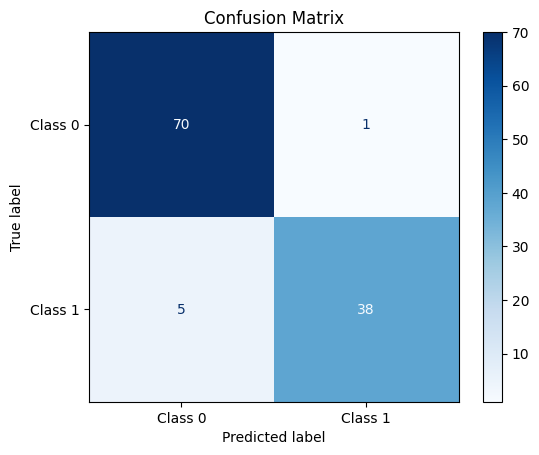

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# model evaluation
with torch.no_grad():
    y_pred_probs = model.forward(X_test_tensor)
    y_pred = (y_pred_probs > 0.5).float()
    print(f'Accuracy: {accuracy_score(y_test_tensor, y_pred):.4f}')

    # Convert tensors to numpy arrays
    y_pred_np = y_pred.cpu().numpy().astype(int)
    y_true_np = y_test_tensor.cpu().numpy().astype(int)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true_np, y_pred_np, target_names=["Class 0", "Class 1"]))

    # Confusion Matrix
    cm = confusion_matrix(y_true_np, y_pred_np)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()


# **Model Pipeline (Training in Batches Form (Dataset & DataLoader Class)**

In [29]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):

  def __init__(self, features, labels):

    self.features = features
    self.labels = labels

  def __len__(self):

    return len(self.features)

  def __getitem__(self, idx):

    return self.features[idx], self.labels[idx]



In [30]:
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
test_dataset = CustomDataset(X_test_tensor, y_test_tensor)

In [31]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [32]:
class NeuralNetworkNNModule(nn.Module):
  def __init__(self, num_features):
    super(NeuralNetworkNNModule, self).__init__()
    self.linear = nn.Linear(num_features, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, X):
    x = self.linear(X)
    x = self.sigmoid(x)
    return x

In [33]:
learning_rate = 0.1
epochs = 25

In [34]:
# create model
model = NeuralNetworkNNModule(X_train_tensor.shape[1])

# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# define loss function
loss_function = nn.BCELoss()

In [35]:

# define loop
for epoch in range(epochs):

  for batch_features, batch_labels in train_loader:

    # forward pass
    y_pred = model(batch_features)

    # loss calculate
    loss = loss_function(y_pred, batch_labels.view(-1,1))

    # clear gradients
    optimizer.zero_grad()

    # backward pass
    loss.backward()

    # parameters update
    optimizer.step()

  # print loss in each epoch
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Epoch: 1, Loss: 0.22309108078479767
Epoch: 2, Loss: 0.09036027640104294
Epoch: 3, Loss: 0.14164869487285614
Epoch: 4, Loss: 0.1617325395345688
Epoch: 5, Loss: 0.07289520651102066
Epoch: 6, Loss: 0.023010578006505966
Epoch: 7, Loss: 0.10246448218822479
Epoch: 8, Loss: 0.12496975809335709
Epoch: 9, Loss: 0.021985799074172974
Epoch: 10, Loss: 0.005851897411048412
Epoch: 11, Loss: 0.03256300836801529
Epoch: 12, Loss: 0.05944745987653732
Epoch: 13, Loss: 0.12992703914642334
Epoch: 14, Loss: 0.03129671886563301
Epoch: 15, Loss: 0.10580254346132278
Epoch: 16, Loss: 0.7636767625808716
Epoch: 17, Loss: 0.05350974202156067
Epoch: 18, Loss: 0.020457834005355835
Epoch: 19, Loss: 0.07244957983493805
Epoch: 20, Loss: 0.12492005527019501
Epoch: 21, Loss: 0.027883430942893028
Epoch: 22, Loss: 0.05944088473916054
Epoch: 23, Loss: 0.16606254875659943
Epoch: 24, Loss: 0.01702374964952469
Epoch: 25, Loss: 0.0043167113326489925


In [36]:
# Model evaluation using test_loader
model.eval()  # Set the model to evaluation mode
accuracy_list = []

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        # Forward pass
        y_pred = model(batch_features)
        y_pred = (y_pred > 0.5).float()  # Convert probabilities to binary predictions

        # Calculate accuracy for the current batch
        batch_accuracy = (y_pred.view(-1) == batch_labels).float().mean().item()
        accuracy_list.append(batch_accuracy)

# Calculate overall accuracy
overall_accuracy = sum(accuracy_list) / len(accuracy_list)
print(f'Accuracy: {overall_accuracy:.4f}')


Accuracy: 0.9844
